# clustering analysis with network x

## 1. load the required packages

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from pandas import Series,DataFrame
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from node2vec import Node2Vec

## 2. import dataset and obtain the preprocessed data

### 2.1 dataset for 2020

In [6]:
df = pd.read_excel(r'C:\Users\Laptop\OneDrive\Bureaublad\kul_mda_barbados-main\data\all_submission_files2.xlsx')
data=df[df["report_end_date"].dt.year==2020]
data.head(n=6)

,Unnamed: 0,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType,ticker
0,0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608000,211680,SH,SHW
1,1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300000,107698,SH,DIA
2,2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894000,143339,SH,IWB
3,3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909000,78005,SH,QQQ
4,4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973000,62988,SH,IWM
5,5,2020-09-30,1129770,SPDR S&P Mid-Cap 4,COM,78464a821,9351708000,27600,SH,SPY


graph of the data

In [ ]:
# Build a network of all CIK's with their cusip's. (so all funds with their investees)
# There are no links between CIK's nor links between cusip's, only from cik to cusip.
G=nx.Graph()
for i in df.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])

In [40]:
#filter cik's and cusips to make the graphs better visible
data2.sort_values(by="value",ascending=False)
data3=data2.head(50)
print(data3)

    Unnamed: 0 report_end_date      cik              nameOfIssuer  \
0          NaN      2020-09-30  1129770  SPDR S&P 500               
1          1.0      2020-09-30  1129770  SPDR Dow Jones Ind         
2          2.0      2020-09-30  1129770  Ishares Russell            
3          3.0      2020-09-30  1129770  Invesco QQQ TRUST          
4          4.0      2020-09-30  1129770  iShares Russell 20         
5          5.0      2020-09-30  1129770  SPDR S&P Mid-Cap 4         
6          6.0      2020-09-30  1129770  Amazon Com Inc             
7          7.0      2020-09-30  1129770  SPDR S&P Homebuild         
8          8.0      2020-09-30  1129770  Central Fd Cda Ltd         
9          9.0      2020-09-30  1129770  Accelerate Diagnos         
10        10.0      2020-09-30  1129770  iShares Russell 20         
11        11.0      2020-09-30  1129770  SPDR Industrial Se         
12        12.0      2020-09-30  1129770  Vanguard Small-Cap         
13        13.0      2020-09-30  11

In [41]:
G=nx.Graph()
for i in data3.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])

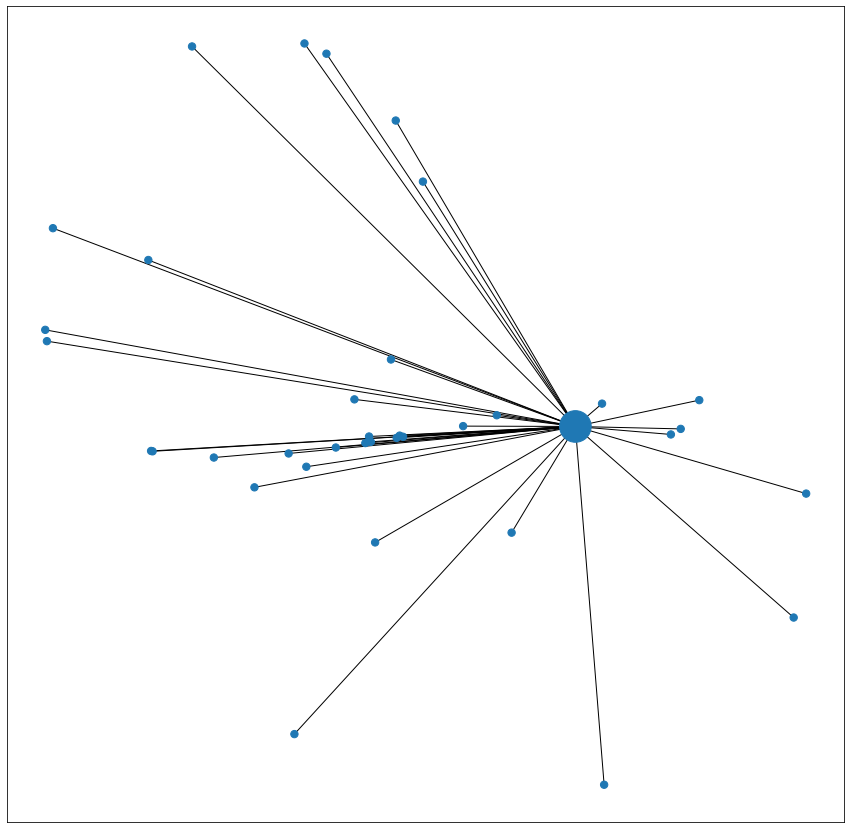

In [42]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 1000 for v in betCent.values()]
#width = [w for w in ]
pos = nx.spring_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=False,
                 node_size=node_size)

In [43]:
# Use index to parse the betCent dictionary in a Dataframe, it has this structure:
# 'index' : dict like {index -> {column -> value}}
data3_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
data3_betweenness.columns=['betweenness']
data3_betweenness.sort_values(by='betweenness',ascending=False,inplace=True)
data3_betweenness.head()

,betweenness
1129770,1.000000
922908769,0.054054
922042858,0.054054
72201r833,0.054054
20002101,0.054054


In [44]:
important_nodes = data3_betweenness.head(10).index.values
top_tree = important_nodes[0:3]
other_nodes = important_nodes[3:-1]

In [45]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= 5 and d['weight']>1)]

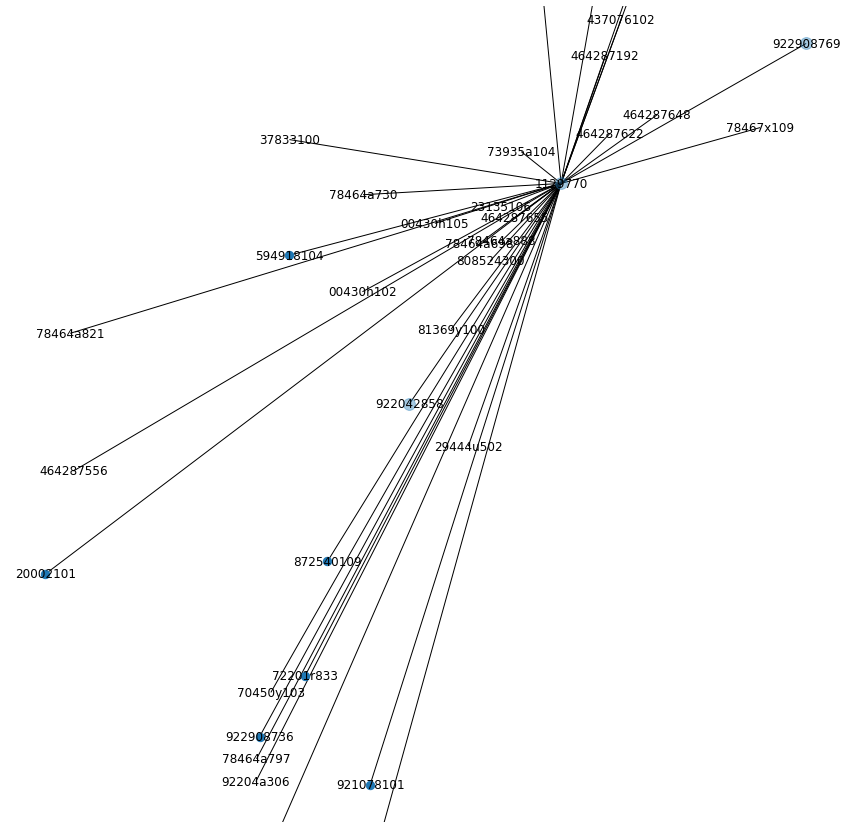

In [46]:
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(15,15))
# nodes
nx.draw_networkx_nodes(G, 
                       nodelist=top_tree,
                       pos=pos, 
                       alpha=0.4,
                       node_size=140)

nx.draw_networkx_nodes(G, 
                       nodelist=other_nodes,
                       pos=pos, node_size=70)

# edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=elarge, 
                       width=1)
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=esmall, 
                       width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, 
                        pos=pos)

plt.axis("off")
plt.show()

In [ ]:
df2=df[df["report_end_date"].dt.year==2020]
df2.head()

In [ ]:
G=nx.Graph()
for i in df2.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])

In [ ]:
G = nx.complete_graph(5)
for i in df2.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])
print(nx.clustering(G))

In [ ]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 1000 for v in betCent.values()]
#width = [w for w in ]
pos = nx.spring_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=False,
                 node_size=node_size)

In [ ]:
df2_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
df2_betweenness.columns=['betweenness']
df2_betweenness.sort_values(by='betweenness',ascending=False,inplace=True)
df2_betweenness.head()

In [ ]:
important_nodes = df2_betweenness.head(10).index.values
top_tree = important_nodes[0:3]
other_nodes = important_nodes[3:-1]

In [ ]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= 5 and d['weight']>1)]

In [ ]:
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(15,15))
# nodes
nx.draw_networkx_nodes(G, 
                       nodelist=top_tree,
                       pos=pos, 
                       alpha=0.4,
                       node_size=140)

nx.draw_networkx_nodes(G, 
                       nodelist=other_nodes,
                       pos=pos, node_size=70)

# edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=elarge, 
                       width=1)
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=esmall, 
                       width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, 
                        pos=pos)

plt.axis("off")
plt.show()

### 2.2 summary of the dataset

In [ ]:
Retrieve the number of stock and total amount of investment in stocks for each company during 2020

In [ ]:
data_summary = data.groupby('cik').agg({'value': ['sum', 'count']})
index_name = data_summary.index
total_value = []
number_stocks = []
for i in range(0, len(data_summary)):
  total_value.append(data_summary.values[i, 0])
  number_stocks.append(data_summary.values[i, 1])
data_final = {'cik':index_name,'number_stocks': number_stocks, 'total_value': total_value}
data_final = DataFrame(data_final)
data_final = data_final.drop(data_final[data_final['total_value']==0].index)
data_final.head(n=6)

### 2.3 adjust the scale of the data

Take the logarithmic transformation of the total value and number of stocks.

In [ ]:
data_log = data_final.copy()
data_log['number_stocks'] = numpy.log(data_log['number_stocks'])
data_log['total_value'] = numpy.log(data_log['total_value'])
data_log.head(n=6)

## 3. visualize the data

### 3.1 plot the transformed dataset

In [ ]:
data_label= data_log[(data_log.total_value>15)|(data_log.total_value<11)]
fig=plt.figure(figsize=(12, 13))
sns.lmplot(x='number_stocks',y='total_value',data=data_log,fit_reg=True) 
for i in range (len(data_label)):
    plt.annotate(data_label['cik'].iloc[i],(data_label['number_stocks'].iloc[i],data_label['total_value'].iloc[i]))

In [ ]:
nx.draw(G,with_labels=True, node_color='b',node_size=500)

In [ ]:
node2vec= Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
model=node2vec.fit(window=10, min_count=1)
model.wv.most_similar('1')
model.wv.save_word2vec_format("netwerk")